In [7]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# from ann_visualizer.visualize import ann_viz
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D, Dropout

%matplotlib inline

In [17]:
data_folder = "./lego-dataset/"
datasets = os.listdir(data_folder)



data_path = [os.path.join(data_folder, dataset) for dataset in datasets]
data_path

['./lego-dataset/2x2', './lego-dataset/1x2x2', './lego-dataset/1x2']

(200, 200)


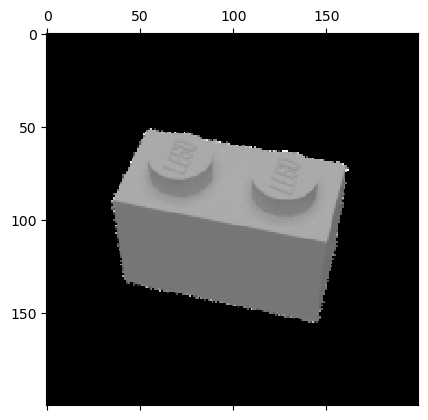

In [ ]:
img = cv2.imread("./lego-dataset/1x2/0001.png", 0)
print(img.shape)

plt.matshow(img, cmap="gray")

In [136]:
one_by_two = []
data = []
target = []
for i, path in enumerate(data_path):
    for file in os.scandir(path):
        img = cv2.imread(file.path, 0)
        # one_by_two.append(img)
        data.append(img)
        target.append(i)

        one_by_two.append([file.path, path.split("/")[2]])

df = pd.DataFrame(one_by_two, columns=["Path", "Target"])


data = np.array(data)
target = np.array(target)
print(data.shape)
print(target.shape)

(848, 200, 200)
(848,)


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=42
)


X_train = X_train / 255
X_test = X_test / 255

# Save numpy

In [173]:
np.save("X_test", X_test)
np.save("X_train", X_train)
np.save("y_test", y_test)
np.save("y_train", y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    848 non-null    object
 1   Target  848 non-null    object
dtypes: object(2)
memory usage: 13.4+ KB


<Axes: xlabel='Target', ylabel='Count'>

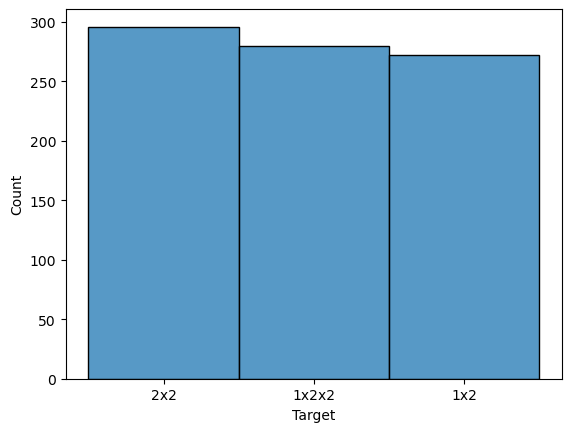

In [124]:
df.info()

sns.histplot(df.Target)

In [125]:
df.isnull().sum()

Path      0
Target    0
dtype: int64

In [131]:
df.head()

,Path,Target
0,./lego-dataset/2x2/0294.png,2x2
1,./lego-dataset/2x2/0295.png,2x2
2,./lego-dataset/2x2/0127.png,2x2
3,./lego-dataset/2x2/0041.png,2x2
4,./lego-dataset/2x2/0120.png,2x2


In [11]:
model = Sequential()
model.add(
    Conv2D(
        filters=16,
        kernel_size=(3, 3),
        activation="relu",
        padding="same",
        input_shape=(200, 200, 1),
    )
)
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="valid"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [17]:
X_train = np.load('./X_train.npy')
y_train = np.load('./y_train.npy')
X_test = np.load('./X_test.npy')
y_test = np.load('./y_test.npy')

In [15]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
19/19 [==============================] - 3s 131ms/step - loss: 0.0173 - accuracy: 0.9966
Epoch 2/5
19/19 [==============================] - 3s 139ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 3/5
19/19 [==============================] - 3s 131ms/step - loss: 0.0059 - accuracy: 0.9983
Epoch 4/5
19/19 [==============================] - 3s 137ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 5/5
19/19 [==============================] - 3s 133ms/step - loss: 0.0017 - accuracy: 1.0000


In [18]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 42ms/step - loss: 0.0139 - accuracy: 0.9961


[0.0139305479824543, 0.9960784316062927]

8/8 [==============================] - 0s 36ms/step


Text(95.72222222222221, 0.5, 'Truth')

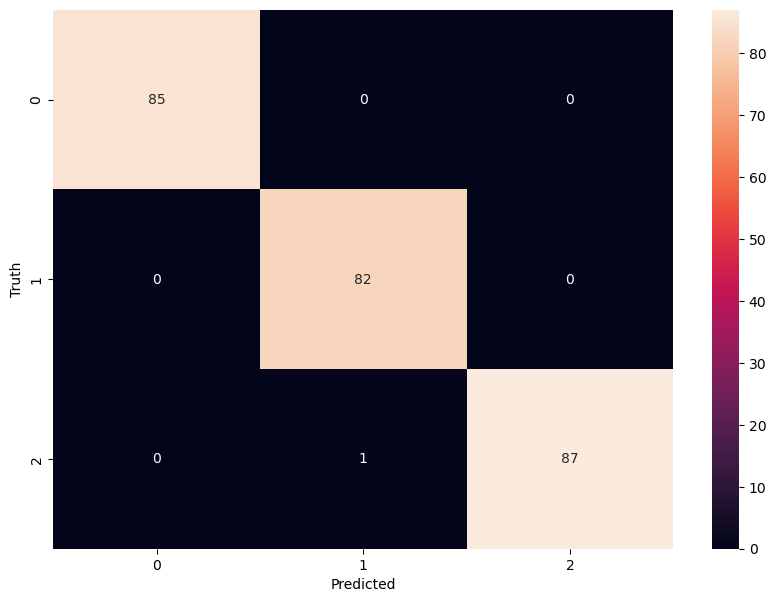

In [19]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [20]:
model.save("model")

2023-04-19 13:51:13.351784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100,100,16]
	 [[{{node inputs}}]]
2023-04-19 13:51:13.504708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100,100,16]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [184]:
saved_model = tf.keras.models.load_model("./model/")

saved_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 200, 200, 16)      160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 100, 100, 16)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 98, 98, 16)        2320      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 38416)           

In [185]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 200, 200, 16)      160       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 100, 100, 16)      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 98, 98, 16)        2320      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 38416)           

In [2]:
def cnn_fun(filter,kernel_size, activations, dense, rate, pooling):
    # Define the model architecture
    model = Sequential()
    model.add(
            Conv2D(
            filters=filter,
            kernel_size=kernel_size,
            activation=activations,
            padding="same",
            input_shape=(200, 200, 1)
        ))
    model.add(MaxPooling2D(pooling))
    model.add(Dropout(rate=rate))
    model.add(Conv2D(filters=filter, kernel_size=kernel_size, activation=activations, padding="valid"))
    model.add(MaxPooling2D(pooling))
    model.add(Flatten())
    model.add(Dense(10, activation=dense))
    

    model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    )
    return model

In [3]:
from keras.wrappers.scikit_learn import KerasClassifier

# Use the random grid to search for best hyperparameters
# First create the base model to tune
cnn_model = KerasClassifier(build_fn=cnn_fun, verbose=1)

2023-04-19 13:06:40.302617: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-19 13:06:40.329022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/tmp/ipykernel_725/1750666981.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_model = KerasClassifier(build_fn=cnn_fun, verbose=1)


In [4]:
random_grid = {
    'filter':[14,16,18],
    'activations':['relu','sigmoid','tanh'],
    'dense':['softmax','sigmoid'],
    'kernel_size':[(3,3),(5,5)],
    'pooling':[(2,2),(3,3)],
    'rate':[0.3,0.5,0.1]
}

In [5]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_cnn = RandomizedSearchCV(estimator = cnn_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [9]:
X_train = np.load('./X_train.npy')
y_train = np.load('./y_train.npy')

In [10]:
random_cnn.fit(X_train, y_train, epochs=5)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Epoch 1/5
13/13 [==============================] - 2s 120ms/step - loss: 0.9184 - accuracy: 0.6835
Epoch 2/5
13/13 [==============================] - 2s 119ms/step - loss: 0.2405 - accuracy: 0.9165
Epoch 3/5
13/13 [==============================] - 2s 117ms/step - loss: 0.1539 - accuracy: 0.9595
Epoch 4/5
13/13 [==============================] - 2s 119ms/step - loss: 0.1432 - accuracy: 0.9570
Epoch 5/5
7/7 [==============================] - 0s 31ms/step - loss: 0.2030 - accuracy: 0.9394
[CV] END activations=tanh, dense=sigmoid, filter=16, kernel_size=(5, 5), pooling=(3, 3), rate=0.3; total time=   9.5s
Epoch 1/5
13/13 [==============================] - 2s 121ms/step - loss: 0.8212 - accuracy: 0.7291
Epoch 2/5
13/13 [==============================] - 2s 121ms/step - loss: 0.2480 - accuracy: 0.9089
Epoch 3/5
13/13 [==============================] - 1s 114ms/step - loss: 0.1497 - accuracy: 0.9595
Epoch 4/5
13/13 [=============

KeyboardInterrupt: 